# K-Means Clustering - Synthetic Dataset

Goal of this notebook is to implement the K-Means Clustering algorthm on a synthitic dataset, made using the make_blobs module in sci-kit learn.

* We will find the ideal number of clusters(n_clusters) using the elbow method as well as the kneedle algorithm
* Train a K-Means model based on the data
* Visualize the clusters before and after clustering

In [90]:
!pip install kneed

In [91]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from kneed import KneeLocator

import plotly.express as px

In [92]:
os.environ["OMP_NUM_THREADS"] = "4"
%matplotlib inline

# Creating the dataset

In [93]:
X, y = make_blobs(n_samples=1000, n_features=3, centers=3, random_state=42)

In [94]:
print(X.shape)
X[:3]

(1000, 3)


array([[-1.62313406,  8.87720831,  4.84001326],
       [ 1.71267112, -5.15279335, -6.78367587],
       [-1.94449656,  8.37968109,  5.63563107]])

In [95]:
print(y.shape)
np.unique(y)

(1000,)


array([0, 1, 2])

# Train Test Split

In [96]:
X_train, X_test, _, _ = train_test_split(X, y, random_state=42, test_size=0.2)

# Visualizing X_train

In [97]:
px.scatter_3d(x=X_train[:, 0], y=X_train[:, 1], z=X_train[:, 2])

# Scaling Data

In [98]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.std(), X_train.mean(), X_test.std(), X_test.mean()

(0.9999999999999998,
 -1.5247062871518816e-16,
 1.0101609485605803,
 -0.0040462718775285365)

# Finding ideal k

## Using elbow curve

In [99]:
wcss = []

def k_finder():
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1)
        kmeans.fit(X_train)
        inertia = kmeans.inertia_
        wcss.append(inertia)

In [100]:
warnings.filterwarnings('ignore')
k_finder()

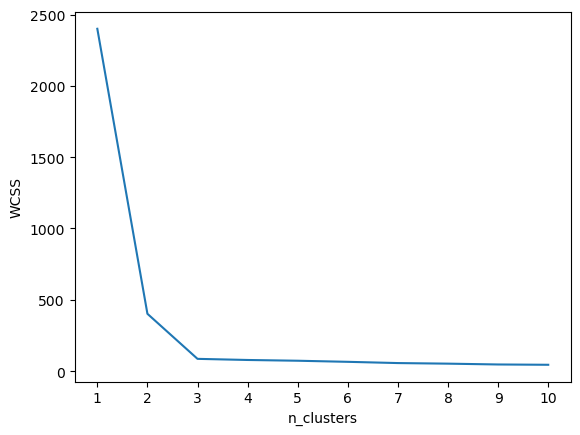

In [101]:
# Plotting the inertia curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel('n_clusters')
plt.ylabel('WCSS')
plt.show()

* WCSS starts to taper out after n_clusters=3. Hence 3 seems to be a good value for the hyperparameter.

## Using KneeLocator

In [102]:
kneedle = KneeLocator(x=range(1, 11), y=wcss, S=1.0, curve="convex", direction="decreasing")

ideal_k = kneedle.knee

print("Ideal k:", ideal_k)

Ideal k: 3


# Training Data

In [103]:
kmeans = KMeans(n_clusters=ideal_k, init='k-means++', n_init='auto')

In [104]:
kmeans.fit(X_train)

KMeans(n_clusters=3, n_init='auto')

# Clustering Test Data

In [105]:
y_pred = kmeans.predict(X_test)

# Visualizing Predicted Clusters

In [106]:
px.scatter_3d(x=X_test[:, 0], y=X_test[:, 1], z=X_test[:, 2], color=y_pred)